## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Question:

### What characteristics are good predictors of the patient status? (Predictive / Inference)

## Reading Data - Patient Info

#### [Dataset Description](https://www.kaggle.com/kimjihoo/ds4c-what-is-this-dataset-detailed-description)

In [2]:
patient_info = pd.read_csv('../../data/PatientInfo.csv')

#### Taking a look at the data

In [3]:
patient_info.head(30)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
5,1000000006,10.0,female,1966.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,43.0,NaN,2020-01-31,2020-02-19,NaN,released
6,1000000007,11.0,male,1995.0,20s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,0.0,NaN,2020-01-31,2020-02-10,NaN,released
7,1000000008,13.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0.0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,19.0,male,1983.0,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68.0,NaN,2020-02-05,2020-02-21,NaN,released
9,1000000010,21.0,female,1960.0,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,3.0,1.000000e+09,6.0,NaN,2020-02-05,2020-02-29,NaN,released


In [4]:
patient_info.shape

(3326, 18)

In [5]:
patient_info.describe()

,patient_id,global_num,birth_year,infection_order,infected_by,contact_number
count,3.326000e+03,2237.000000,2889.000000,31.000000,8.060000e+02,614.000000
mean,3.514908e+09,6669.169423,1974.956732,2.387097,2.671714e+09,18.710098
std,2.209142e+09,3321.396732,20.275471,1.453213,1.740450e+09,75.352899
min,1.000000e+09,1.000000,1916.000000,1.000000,1.000000e+09,0.000000
25%,1.300000e+09,4172.000000,1961.000000,1.000000,1.200000e+09,2.000000
50%,2.000001e+09,7855.000000,1975.000000,2.000000,2.000000e+09,4.000000
75%,6.001001e+09,9433.000000,1993.000000,3.000000,4.100000e+09,14.000000
max,7.000000e+09,10660.000000,2020.000000,6.000000,7.000000e+09,1160.000000


In [6]:
patient_info.describe(include=['object'])

,sex,age,country,province,city,disease,infection_case,symptom_onset_date,confirmed_date,released_date,deceased_date,state
count,3260,3252,3326,3326,3247,18,2559,471,3323,1218,60,3326
unique,2,11,11,17,151,1,23,69,77,66,33,3
top,female,20s,Korea,Gyeongsangbuk-do,Gyeongsan-si,True,contact with patient,2020-02-27,2020-03-05,2020-03-20,2020-03-02,released
freq,1831,790,3300,1223,631,18,949,29,145,69,4,1637


#### Checking for missing data

In [7]:
patient_info.apply(lambda x: x.isnull().mean(), axis=0).sort_values(ascending=False)

disease               0.994588
infection_order       0.990679
deceased_date         0.981960
symptom_onset_date    0.858388
contact_number        0.815394
infected_by           0.757667
released_date         0.633794
global_num            0.327420
infection_case        0.230607
birth_year            0.131389
city                  0.023752
age                   0.022249
sex                   0.019844
confirmed_date        0.000902
state                 0.000000
country               0.000000
province              0.000000
patient_id            0.000000
dtype: float64

### Model Design

#### Model V. 0.1 - y ~ X:
- y = state
- X = f ( province, sex, age, infection_case )

In [147]:
model_v01_data = patient_info[['province', 'sex', 'age', 'infection_case', 'state']]

In [148]:
print(model_v01_data.shape)
model_v01_data.head()

(3326, 5)


,province,sex,age,infection_case,state
0,Seoul,male,50s,overseas inflow,released
1,Seoul,male,30s,overseas inflow,released
2,Seoul,male,50s,contact with patient,released
3,Seoul,male,20s,overseas inflow,released
4,Seoul,female,20s,contact with patient,released


#### Deciding what to do for each column (missing data, value encoding, data treatment)

##### infection_case

In [149]:
patients_infection_case = patient_info[~patient_info['infection_case'].isnull()]
print(patients_infection_case.shape)
patients_infection_case.sort_values(['confirmed_date'])

(2559, 18)


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
846,1400000001,1.0,female,1985.0,30s,China,Incheon,etc,NaN,overseas inflow,NaN,NaN,NaN,2020-01-19,2020-01-20,2020-02-06,NaN,released
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1065,2000000001,3.0,male,1966.0,50s,Korea,Gyeonggi-do,Goyang-si,NaN,overseas inflow,1.0,NaN,16.0,NaN,2020-01-26,2020-02-12,NaN,released
1066,2000000002,4.0,male,1964.0,50s,Korea,Gyeonggi-do,Pyeongtaek-si,NaN,overseas inflow,1.0,NaN,95.0,NaN,2020-01-27,2020-02-09,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,2000000656,NaN,male,1964.0,50s,Korea,Gyeonggi-do,Namyangju-si,NaN,contact with patient,NaN,2.000001e+09,NaN,NaN,2020-04-19,NaN,NaN,isolated
937,1400000092,NaN,male,1992.0,20s,Korea,Incheon,Gyeyang-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-19,NaN,NaN,isolated
2923,6011000051,NaN,female,1980.0,40s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated
2924,6011000052,NaN,female,2011.0,0s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated


In [150]:
patients_infection_case.state.value_counts()

isolated    1437
released    1094
deceased      28
Name: state, dtype: int64

In [151]:
patients_infection_case.infection_case.value_counts()

contact with patient                     949
etc                                      567
overseas inflow                          567
Guro-gu Call Center                      112
Shincheonji Church                       107
Onchun Church                             33
Bonghwa Pureun Nursing Home               31
gym facility in Cheonan                   30
Ministry of Oceans and Fisheries          28
Cheongdo Daenam Hospital                  21
Dongan Church                             17
Eunpyeong St. Mary's Hospital             16
Gyeongsan Seorin Nursing Home             15
Seongdong-gu APT                          13
Gyeongsan Jeil Silver Town                12
Milal Shelter                             11
Gyeongsan Cham Joeun Community Center     10
Geochang Church                            6
Changnyeong Coin Karaoke                   4
gym facility in Sejong                     4
Suyeong-gu Kindergarten                    3
Pilgrimage to Israel                       2
River of G

As we can see, this column has data which encompasses old and current dates, and comprises all possible patient states. There are many infection case levels which are not going to be individually relevant to the prediction model. Thus, we will keep only two of the original levels: Contact with Patient and Overseas Inflow, and label the rest as Other.As it is a categorical variable, we will create a dummy variable to hold its NA values.

In [152]:
def resume_infection_case_col(inf_case_value):
    if ((pd.isnull(inf_case_value)) or (inf_case_value in ['contact with patient','overseas inflow'])):
        return inf_case_value
    else:
        return 'other'
    
model_v01_data.loc[:,'infection_case'] = model_v01_data['infection_case'].apply(resume_infection_case_col)

/local/tarciso/anaconda3/envs/udacity-ds-p1/lib/python3.6/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [153]:
model_v01_data.head(20)

,province,sex,age,infection_case,state
0,Seoul,male,50s,overseas inflow,released
1,Seoul,male,30s,overseas inflow,released
2,Seoul,male,50s,contact with patient,released
3,Seoul,male,20s,overseas inflow,released
4,Seoul,female,20s,contact with patient,released
5,Seoul,female,50s,contact with patient,released
6,Seoul,male,20s,contact with patient,released
7,Seoul,male,20s,overseas inflow,released
8,Seoul,male,30s,overseas inflow,released
9,Seoul,female,60s,contact with patient,released


In [154]:
model_v01_data = pd.get_dummies(data = model_v01_data, prefix = 'infection_case', prefix_sep = ':', columns = ['infection_case'], drop_first = False, dummy_na = True)

In [155]:
model_v01_data.head()

,province,sex,age,state,infection_case:contact with patient,infection_case:other,infection_case:overseas inflow,infection_case:nan
0,Seoul,male,50s,released,0,0,1,0
1,Seoul,male,30s,released,0,0,1,0
2,Seoul,male,50s,released,1,0,0,0
3,Seoul,male,20s,released,0,0,1,0
4,Seoul,female,20s,released,1,0,0,0


##### age

In [156]:
patients_age = patient_info[~patient_info['age'].isnull()]
print(patients_age.shape)
patients_age.sort_values(['confirmed_date'])

(3252, 18)


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
846,1400000001,1.0,female,1985.0,30s,China,Incheon,etc,NaN,overseas inflow,NaN,NaN,NaN,2020-01-19,2020-01-20,2020-02-06,NaN,released
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1065,2000000001,3.0,male,1966.0,50s,Korea,Gyeonggi-do,Goyang-si,NaN,overseas inflow,1.0,NaN,16.0,NaN,2020-01-26,2020-02-12,NaN,released
1066,2000000002,4.0,male,1964.0,50s,Korea,Gyeonggi-do,Pyeongtaek-si,NaN,overseas inflow,1.0,NaN,95.0,NaN,2020-01-27,2020-02-09,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,2000000655,NaN,female,1998.0,20s,Korea,Gyeonggi-do,Yongin-si,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-19,NaN,NaN,isolated
937,1400000092,NaN,male,1992.0,20s,Korea,Incheon,Gyeyang-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-19,NaN,NaN,isolated
2923,6011000051,NaN,female,1980.0,40s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated
2924,6011000052,NaN,female,2011.0,0s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated


In [157]:
patient_info[patient_info['age'].isnull() & (~patient_info['birth_year'].isnull())]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state


In [158]:
patients_age.state.value_counts()

released    1627
isolated    1558
deceased      67
Name: state, dtype: int64

In [159]:
patients_age.age.value_counts()

20s     790
50s     589
40s     453
30s     425
60s     398
70s     197
80s     155
10s     146
0s       53
90s      45
100s      1
Name: age, dtype: int64

As we can see, this column has data which encompasses old and current dates, and comprises all possible patient states. As it is in essence a numeric variable, we will turn it into one, and will fill in its missing values with the mean.

In [160]:
model_v01_data.loc[:,'age'] = model_v01_data.age.str.replace('s','').astype('float')
model_v01_data.loc[:,'age'] = model_v01_data.age.fillna(model_v01_data.age.mean())

In [161]:
model_v01_data

,province,sex,age,state,infection_case:contact with patient,infection_case:other,infection_case:overseas inflow,infection_case:nan
0,Seoul,male,50.0,released,0,0,1,0
1,Seoul,male,30.0,released,0,0,1,0
2,Seoul,male,50.0,released,1,0,0,0
3,Seoul,male,20.0,released,0,0,1,0
4,Seoul,female,20.0,released,1,0,0,0
...,...,...,...,...,...,...,...,...
3321,Jeju-do,female,20.0,isolated,0,0,1,0
3322,Jeju-do,female,20.0,isolated,0,0,1,0
3323,Jeju-do,male,30.0,isolated,1,0,0,0
3324,Jeju-do,female,20.0,isolated,0,0,1,0


In [162]:
model_v01_data.age.mean()

40.528905289052865

In [163]:
model_v01_data[model_v01_data['age'] == patient_info.age.str.replace('s','').astype(float).mean()]

,province,sex,age,state,infection_case:contact with patient,infection_case:other,infection_case:overseas inflow,infection_case:nan
563,Seoul,NaN,40.528905,released,0,1,0,0
564,Seoul,NaN,40.528905,isolated,0,0,1,0
565,Seoul,NaN,40.528905,isolated,0,0,1,0
566,Seoul,NaN,40.528905,isolated,0,0,1,0
567,Seoul,NaN,40.528905,isolated,0,0,1,0
...,...,...,...,...,...,...,...,...
2926,Gyeongsangbuk-do,female,40.528905,released,0,1,0,0
2927,Gyeongsangbuk-do,NaN,40.528905,released,0,1,0,0
3228,Gyeongsangnam-do,NaN,40.528905,isolated,0,0,0,1
3229,Gyeongsangnam-do,NaN,40.528905,isolated,0,0,0,1


##### sex

In [164]:
patients_sex = patient_info[~patient_info['sex'].isnull()]
print(patients_sex.shape)
patients_sex.sort_values(['confirmed_date'])

(3260, 18)


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
846,1400000001,1.0,female,1985.0,30s,China,Incheon,etc,NaN,overseas inflow,NaN,NaN,NaN,2020-01-19,2020-01-20,2020-02-06,NaN,released
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1065,2000000001,3.0,male,1966.0,50s,Korea,Gyeonggi-do,Goyang-si,NaN,overseas inflow,1.0,NaN,16.0,NaN,2020-01-26,2020-02-12,NaN,released
1066,2000000002,4.0,male,1964.0,50s,Korea,Gyeonggi-do,Pyeongtaek-si,NaN,overseas inflow,1.0,NaN,95.0,NaN,2020-01-27,2020-02-09,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,2000000656,NaN,male,1964.0,50s,Korea,Gyeonggi-do,Namyangju-si,NaN,contact with patient,NaN,2.000001e+09,NaN,NaN,2020-04-19,NaN,NaN,isolated
1719,2000000655,NaN,female,1998.0,20s,Korea,Gyeonggi-do,Yongin-si,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-19,NaN,NaN,isolated
2923,6011000051,NaN,female,1980.0,40s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated
2924,6011000052,NaN,female,2011.0,0s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated


In [165]:
patients_sex.state.value_counts()

released    1630
isolated    1563
deceased      67
Name: state, dtype: int64

In [166]:
patients_sex.sex.value_counts()

female    1831
male      1429
Name: sex, dtype: int64

As we can see, this column has data which encompasses old and current dates, and comprises all possible patient states. As it is a categorical variable, and the number of NAs is very low, we will fill in the missing values with the mode and create dummy variables for the levels.

In [167]:
model_v01_data.loc[:,'sex'] = model_v01_data.sex.fillna(model_v01_data.sex.mode())

In [168]:
model_v01_data = pd.get_dummies(data = model_v01_data, prefix = 'sex', prefix_sep = ':', columns = ['sex'], drop_first = False, dummy_na = True)

In [169]:
model_v01_data.head()

,province,age,state,infection_case:contact with patient,infection_case:other,infection_case:overseas inflow,infection_case:nan,sex:female,sex:male,sex:nan
0,Seoul,50.0,released,0,0,1,0,0,1,0
1,Seoul,30.0,released,0,0,1,0,0,1,0
2,Seoul,50.0,released,1,0,0,0,0,1,0
3,Seoul,20.0,released,0,0,1,0,0,1,0
4,Seoul,20.0,released,1,0,0,0,1,0,0


##### province

In [170]:
patients_province = patient_info[~patient_info['province'].isnull()]
print(patients_province.shape)
patients_province.sort_values(['confirmed_date'])

(3326, 18)


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
846,1400000001,1.0,female,1985.0,30s,China,Incheon,etc,NaN,overseas inflow,NaN,NaN,NaN,2020-01-19,2020-01-20,2020-02-06,NaN,released
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1065,2000000001,3.0,male,1966.0,50s,Korea,Gyeonggi-do,Goyang-si,NaN,overseas inflow,1.0,NaN,16.0,NaN,2020-01-26,2020-02-12,NaN,released
1066,2000000002,4.0,male,1964.0,50s,Korea,Gyeonggi-do,Pyeongtaek-si,NaN,overseas inflow,1.0,NaN,95.0,NaN,2020-01-27,2020-02-09,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,2000000656,NaN,male,1964.0,50s,Korea,Gyeonggi-do,Namyangju-si,NaN,contact with patient,NaN,2.000001e+09,NaN,NaN,2020-04-19,NaN,NaN,isolated
1719,2000000655,NaN,female,1998.0,20s,Korea,Gyeonggi-do,Yongin-si,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-19,NaN,NaN,isolated
2923,6011000051,NaN,female,1980.0,40s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated
2924,6011000052,NaN,female,2011.0,0s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated


In [171]:
patients_province.state.value_counts()

released    1637
isolated    1622
deceased      67
Name: state, dtype: int64

In [172]:
patients_province.province.value_counts()

Gyeongsangbuk-do     1223
Gyeonggi-do           656
Seoul                 624
Chungcheongnam-do     141
Busan                 129
Gyeongsangnam-do      115
Incheon                92
Daegu                  63
Sejong                 46
Chungcheongbuk-do      44
Ulsan                  42
Daejeon                39
Gangwon-do             37
Gwangju                30
Jeollabuk-do           17
Jeollanam-do           15
Jeju-do                13
Name: province, dtype: int64

As we can see, this column has data which encompasses old and current dates, and comprises all possible patient states. As it is a categorical variable, we will fill create dummy variables for the levels.

In [173]:
model_v01_data = pd.get_dummies(data = model_v01_data, prefix = 'province', prefix_sep = ':', columns = ['province'], drop_first = False, dummy_na = True)

In [174]:
model_v01_data.head()

,age,state,infection_case:contact with patient,infection_case:other,infection_case:overseas inflow,infection_case:nan,sex:female,sex:male,sex:nan,province:Busan,...,province:Gyeongsangbuk-do,province:Gyeongsangnam-do,province:Incheon,province:Jeju-do,province:Jeollabuk-do,province:Jeollanam-do,province:Sejong,province:Seoul,province:Ulsan,province:nan
0,50.0,released,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,30.0,released,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,50.0,released,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,20.0,released,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,20.0,released,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


##### state

In [175]:
model_v01_data.state.value_counts()

released    1637
isolated    1622
deceased      67
Name: state, dtype: int64

As we can see, there are three possible states for the patient. As we are aiming at final states, we will only consider the states: released and deceased, removing rows with the other states. We will also encode it as a binary variable (0 for released and 1 for deceased).

In [176]:
model_v01_data = model_v01_data[model_v01_data['state'].isin(['released','deceased'])]
model_v01_data.loc[:,'state'] = model_v01_data['state'].transform(lambda x: 0 if x == 'released' else 1)

In [177]:
model_v01_data.head()

,age,state,infection_case:contact with patient,infection_case:other,infection_case:overseas inflow,infection_case:nan,sex:female,sex:male,sex:nan,province:Busan,...,province:Gyeongsangbuk-do,province:Gyeongsangnam-do,province:Incheon,province:Jeju-do,province:Jeollabuk-do,province:Jeollanam-do,province:Sejong,province:Seoul,province:Ulsan,province:nan
0,50.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,30.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,50.0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,20.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,20.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [178]:
model_v01_data.shape

(1704, 27)

In [179]:
model_v01_data.state.value_counts()

0    1637
1      67
Name: state, dtype: int64

In [180]:
model_v01_data.state.value_counts()[0]/model_v01_data.state.value_counts()[1]

24.432835820895523

### Create Model

#### Split Original data into Train/Test data

In [181]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(model_v01_data.drop('state', axis=1), model_v01_data['state'], test_size=0.2, random_state=199)

#### Run Cross-validation using the model pipeline

In [182]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
model = LogisticRegression(random_state=199, class_weight={0:1.0,1:24.4},
                                 solver='lbfgs', multi_class='auto')

pipeline = make_pipeline(scaler, model)

kf = KFold(n_splits=10, shuffle=True, random_state=199)
cv_results = cross_val_score(pipeline, # Pipeline
                             x_train, # Feature matrix
                             y_train, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [183]:
cv_results

array([0.87591241, 0.89781022, 0.89781022, 0.88970588, 0.90441176,
       0.91911765, 0.93382353, 0.91176471, 0.91176471, 0.93382353])

#### Fit model on whole train data and then predict on test data

In [184]:
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)
model.fit(x_train_std, y_train)
y_pred = model.predict(x_test_std)

In [185]:
train_score = model.score(x_train_std, y_train)
print(train_score)

0.9134262655906089


In [186]:
test_score = model.score(x_test_std, y_test)
print(test_score)

0.8944281524926686


In [187]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[296,  31],
       [  5,   9]])

#### Inspecting Model Coefficients

In [188]:
model.classes_

array([0, 1])

In [189]:
coef_dict = {}
for coef, feat in zip(model.coef_[0],list(x_train.columns.values)):
    coef_dict[feat] = coef
{k: v for k, v in sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True)}

{'age': 2.2840649793322547,
 'infection_case:contact with patient': -1.6738581459699164,
 'infection_case:other': 1.3086303915997037,
 'province:Gyeongsangbuk-do': 0.983552788582555,
 'province:Gyeongsangnam-do': -0.9487130613769071,
 'province:Daegu': 0.891959934300127,
 'infection_case:overseas inflow': -0.655998735155795,
 'province:Chungcheongnam-do': -0.6462783784533284,
 'province:Gyeonggi-do': 0.6258354467685925,
 'sex:male': 0.6143922905488394,
 'province:Chungcheongbuk-do': -0.6100455167224876,
 'province:Daejeon': -0.6021422694416142,
 'sex:female': -0.5915066874986133,
 'province:Gangwon-do': -0.5566139960340694,
 'province:Incheon': -0.5244987702251156,
 'province:Sejong': -0.49321973784945944,
 'infection_case:nan': 0.4925191695072915,
 'province:Gwangju': -0.32870286848190833,
 'province:Ulsan': 0.22699355313920963,
 'sex:nan': -0.20633587060546527,
 'province:Jeju-do': -0.1696053382349425,
 'province:Jeollabuk-do': -0.07993563189776154,
 'province:Seoul': 0.0759928828832

#### Top Features (higher effect) overall

In [190]:
{k: v for k, v in sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True)[:5]}

{'age': 2.2840649793322547,
 'infection_case:contact with patient': -1.6738581459699164,
 'infection_case:other': 1.3086303915997037,
 'province:Gyeongsangbuk-do': 0.983552788582555,
 'province:Gyeongsangnam-do': -0.9487130613769071}

- Age (+)
- Infection Case - Contact with other Patient (-)
- Infection Case - Other (+)
- Province Gyeongsangnam-do (-)
- Province Gyeongsangbuk-do (+)

#### Top Features (higher effect) for deceased state

In [191]:
{k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1], reverse=True)[:5]}

{'age': 2.2840649793322547,
 'infection_case:other': 1.3086303915997037,
 'province:Gyeongsangbuk-do': 0.983552788582555,
 'province:Daegu': 0.891959934300127,
 'province:Gyeonggi-do': 0.6258354467685925}

- Age
- Infection Case (Other)
- Province Gyeongsangbuk-do
- Province Daegu
- sex Male

#### Top Features (higher effect) for released state

In [192]:
{k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])[:5]}

{'infection_case:contact with patient': -1.6738581459699164,
 'province:Gyeongsangnam-do': -0.9487130613769071,
 'infection_case:overseas inflow': -0.655998735155795,
 'province:Chungcheongnam-do': -0.6462783784533284,
 'province:Chungcheongbuk-do': -0.6100455167224876}

- Infection Case (Contact with other Patient)
- Province Gyeongsangnam-do
- Infection Case (Overseas Inflow)
- Province Chungcheongnam-do
- Province Daejeon

#### Create Diverging Bars plot with Model Coefficients

##### Create dataframe with model coefficients

In [194]:
str_example = 'infection_case'


'Infection Case'

In [210]:
def get_feature_pretty_name(feature):
    pretty_feature_base_name = pretty_feature_detailed_name = join_str = ''
    feature_split = feature.split(':')
    pretty_feature_base_name = feature_split[0].replace('_',' ').title()
    
    if (len(feature_split) > 1):
        join_str = ': '
        if (feature_split[1] == 'nan'):
            pretty_feature_detailed_name = 'Missing Value'
        else:
            pretty_feature_detailed_name = feature_split[1].replace('_',' ').title()
    
    return pretty_feature_base_name + join_str + pretty_feature_detailed_name
    
get_feature_pretty_name('sex:male')

'Sex: Male'

In [211]:
model_coefs_df = pd.DataFrame(coef_dict.items(), columns=['feature', 'coef']).sort_values('coef', ascending=False)
model_coefs_df['color'] = ['red' if x > 0 else 'green' for x in model_coefs_df['coef']]
model_coefs_df['pretty_feature_name'] = model_coefs_df.feature.apply(get_feature_pretty_name)
model_coefs_df.reset_index(inplace=True)
model_coefs_df

,index,feature,coef,color,pretty_feature_name
0,0,age,2.284065,red,Age
1,2,infection_case:other,1.308630,red,Infection Case: Other
2,16,province:Gyeongsangbuk-do,0.983553,red,Province: Gyeongsangbuk-Do
3,11,province:Daegu,0.891960,red,Province: Daegu
4,15,province:Gyeonggi-do,0.625835,red,Province: Gyeonggi-Do
5,6,sex:male,0.614392,red,Sex: Male
6,4,infection_case:nan,0.492519,red,Infection Case: Missing Value
7,24,province:Ulsan,0.226994,red,Province: Ulsan
8,23,province:Seoul,0.075993,red,Province: Seoul
9,8,province:Busan,0.067674,red,Province: Busan


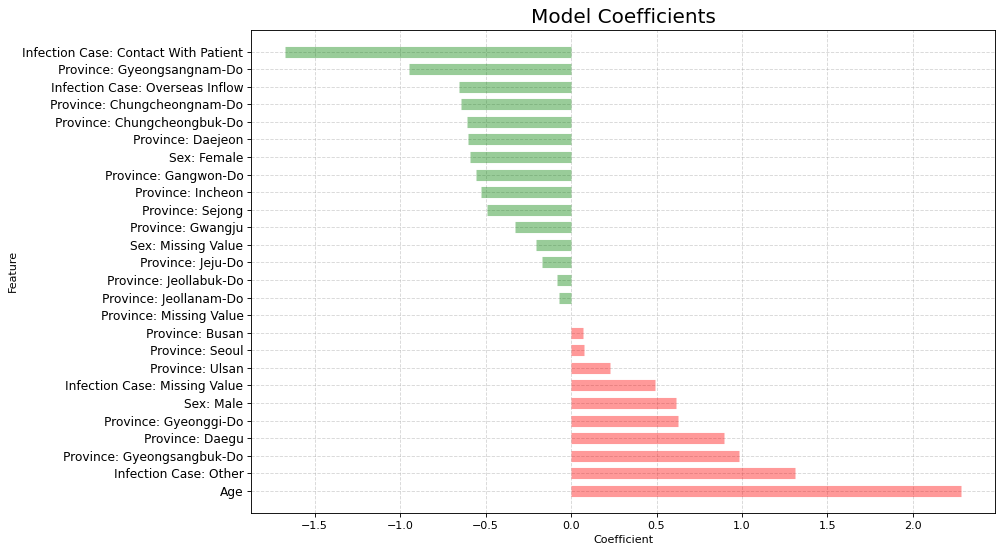

In [216]:
# Draw plot
plt.figure(figsize=(12,8), dpi= 80)
plt.hlines(y=model_coefs_df.index, xmin=0, xmax=model_coefs_df.coef, 
           color=model_coefs_df.color, alpha=0.4, linewidth=10)

# Decorations
plt.gca().set(ylabel='Feature', xlabel='Coefficient')
plt.yticks(model_coefs_df.index, model_coefs_df.pretty_feature_name, fontsize=11)
plt.title('Model Coefficients', fontdict={'size':18})
plt.grid(linestyle='--', alpha=0.5)
plt.show()